In [0]:
corpus = ['Trump is a good man', 
          'Elizabeth is a bad woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'liberal bias is a clever fairytale that allows the right to police the corporation']

Here you can paste the article you're reading and would like to classify for bias

In [0]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be','that', 'to']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [0]:
corpus = remove_stop_words(corpus)

Here the program removes all words which don't add value to the classification of the political polarity of the text. 

In [0]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words) 

In [0]:
words 

{'Elizabeth',
 'Trump',
 'allows',
 'bad',
 'bias',
 'boy',
 'clever',
 'corporation',
 'fairytale',
 'girl',
 'good',
 'king',
 'liberal',
 'man',
 'police',
 'pretty',
 'prince',
 'princess',
 'queen',
 'right',
 'strong',
 'the',
 'woman',
 'young'}

In [0]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [0]:
import pandas as pd
for text in corpus:
    print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])

Trump good man
Elizabeth bad woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
liberal bias clever fairytale allows the right police the corporation


Down here the program forms the phrases without the filler words which don't add value to the classification. This will already give a good scope of the bias in the text.

In [0]:
df.head(50)

,input,label
0,Trump,good
1,Trump,man
2,good,Trump
3,good,man
4,man,Trump
5,man,good
6,Elizabeth,bad
7,Elizabeth,woman
8,bad,Elizabeth
9,bad,woman


In [0]:
df.shape

(80, 2)

In [0]:
word2int

{'Elizabeth': 19,
 'Trump': 20,
 'allows': 16,
 'bad': 3,
 'bias': 12,
 'boy': 15,
 'clever': 2,
 'corporation': 8,
 'fairytale': 1,
 'girl': 0,
 'good': 22,
 'king': 7,
 'liberal': 11,
 'man': 4,
 'police': 6,
 'pretty': 21,
 'prince': 17,
 'princess': 23,
 'queen': 5,
 'right': 9,
 'strong': 14,
 'the': 13,
 'woman': 18,
 'young': 10}

Using the word2int function the vector program assigned a random mathematical integer to each word.

In [0]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

This is the contruction of the real time neural network begins. The training of the neural network begins.

In [0]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 20000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  5.0256166
iteration 3000 loss is :  2.0835366
iteration 6000 loss is :  1.932764
iteration 9000 loss is :  1.887483
iteration 12000 loss is :  1.8598626
iteration 15000 loss is :  1.8356292
iteration 18000 loss is :  1.8164549


This is where the loss function of the 

In [0]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[-0.38691488 -0.48051703]
 [ 2.4028375  -0.24208724]
 [ 1.4383802  -0.46175033]
 [-0.00975849 -0.27867463]
 [-0.82742894 -0.41247627]
 [-2.5078943   1.9804287 ]
 [ 2.5960634   1.8210754 ]
 [-4.928824   -1.772309  ]
 [ 2.8354807   3.5880404 ]
 [ 2.7418573   2.3243878 ]
 [-0.62008685 -0.25607863]
 [ 3.63861    -2.2088008 ]
 [ 2.6413233  -0.8635537 ]
 [ 0.90142256  0.8824371 ]
 [-2.2691844  -2.8259983 ]
 [-4.4541206  -1.9805961 ]
 [ 4.0291743   0.04875274]
 [-3.8245468  -0.6071117 ]
 [-2.5330403   5.1073437 ]
 [-0.00747583 -0.27746403]
 [-1.3548391  -1.5102036 ]
 [ 1.0816041  -3.3310277 ]
 [-1.3913949  -1.6926523 ]
 [-2.1215308   1.2370983 ]]


After running it through the neural network this is the values returned. 

In [0]:
w2v_df = pd.DataFrame(vectors, columns = ['Output 1', 'Output 2',])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'Output 1', 'Output 2']]
w2v_df

,word,Output 1,Output 2
0,girl,-0.386915,-0.480517
1,fairytale,2.402838,-0.242087
2,clever,1.438380,-0.461750
3,bad,-0.009758,-0.278675
4,man,-0.827429,-0.412476
5,queen,-2.507894,1.980429
6,police,2.596063,1.821075
7,king,-4.928824,-1.772309
8,corporation,2.835481,3.588040
9,right,2.741857,2.324388


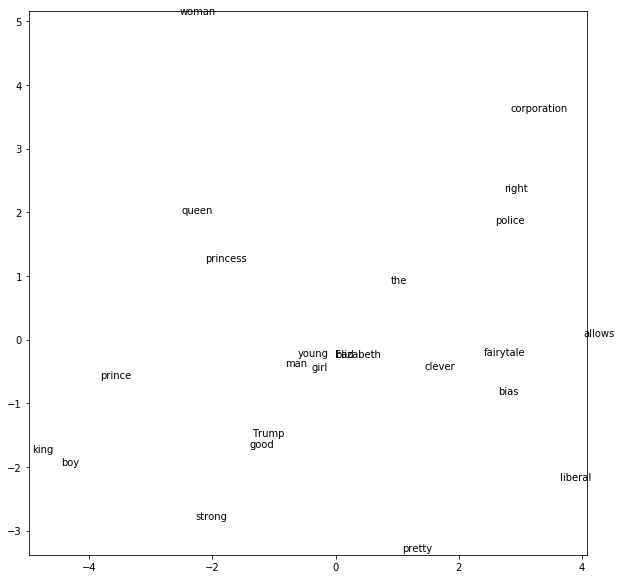

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['Output 1'], w2v_df['Output 2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 0.05
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show() 

This is the final plotting of the data on a graph. This the neural networks best classification of words. 